In [13]:
"""

1. Download ERA5 data at hourly interval

2. Resample to daily intervals and to ISMIP grid.

3. Mask out snowfall rates in the ablation zone.

4. Save as NetCDF4

5. Delete original files

6. Plot snowfall rate in different sectors of the ablation zone.

"""

# Import libraries
import xarray as xr
import cdsapi

c = cdsapi.Client()

# Define path to temporary folder
tmp = '/Users/jryan4/Dropbox (University of Oregon)/research/snowfall/data/tmp_era/'

In [ ]:
r = c.retrieve(
    'reanalysis-era5-single-levels', {
            'variable'    : 'mean_snowfall_rate',
            'product_type': 'reanalysis',
            'year'        : '2017',
            'month'       : '01',
            'day'         : ['01', '02'],
            'time'        : [
                '00:00','01:00','02:00',
                '03:00','04:00','05:00',
                '06:00','07:00','08:00',
                '09:00','10:00','11:00',
                '12:00','13:00','14:00',
                '15:00','16:00','17:00',
                '18:00','19:00','20:00',
                '21:00','22:00','23:00'
            ],
            'area'        : ['84', '-73', '59', '-11'],
            'format'      : 'netcdf'
    })
r.download(tmp + 'tp_20170101-20170102.nc')

2022-06-22 08:57:04,973 INFO Welcome to the CDS
2022-06-22 08:57:04,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-06-22 08:57:05,170 INFO Request is queued


In [ ]:
/Users/jryan4/Downloads/MERRA2_200.tavg1_2d_int_Nx.20000101.SUB.nc

In [3]:
# Read data
era = xr.open_dataset(path + data)

In [5]:
era.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:    (longitude: 249, latitude: 101, time: 744)
Coordinates:
  * longitude  (longitude) float32 -73.0 -72.75 -72.5 ... -11.5 -11.25 -11.0
  * latitude   (latitude) float32 84.0 83.75 83.5 83.25 ... 59.5 59.25 59.0
  * time       (time) datetime64[ns] 2020-07-01 ... 2020-07-31T23:00:00
Data variables:
    msr        (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-21 17:18:43 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...>

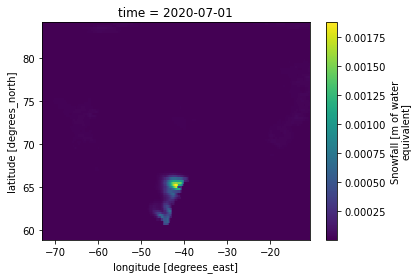

In [7]:
era['sf'][0,:,:].plot()

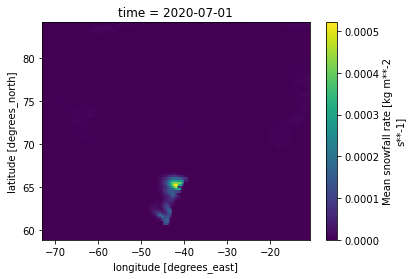

In [9]:
era['msr'][0,:,:].plot()

In [10]:
import cdsapi

ModuleNotFoundError: No module named 'cdsapi'